In [65]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [20]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [21]:
model = LinearRegression()

In [22]:
model

LinearRegression()

In [23]:
# training / fitting
model.fit(x, y)

LinearRegression()

In [24]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


$f(x) = b_0 + b_1 \cdot x_1$

$y = b_0 + b_1 \cdot x_1$


In [25]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 5.633333333333329
slope: [0.54]


$f(x) = b_0 + b_1 \cdot x_1$

$f(x) = 5.633333333333329 + 0.54 \cdot x_1$


In [26]:
def find_y(x):
    intercept = 5.633333333333329
    slope = 0.54
    return intercept + slope * x

In [27]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [31]:
for i in x:
    print(i, find_y(i))

[5] [8.33333333]
[15] [13.73333333]
[25] [19.13333333]
[35] [24.53333333]
[45] [29.93333333]
[55] [35.33333333]


In [34]:
# predicting from training data for evaluation
y_pred = model.predict(x)
print(f"predicted response: {y_pred}")

predicted response: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


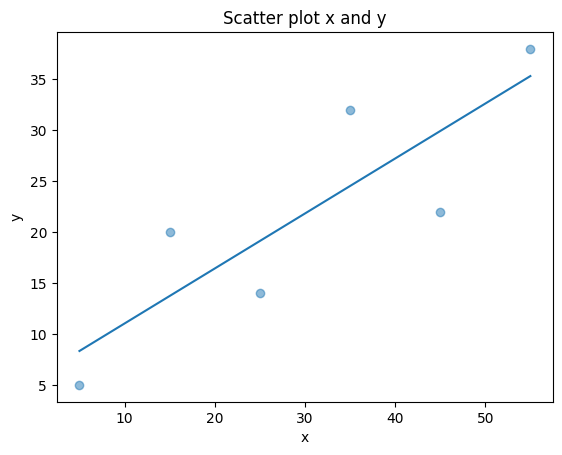

In [37]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title("Scatter plot x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [44]:
# inferencing / predicting from new data
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


## Multiple Linear Regression


### Data Preparation


In [ ]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


### Model Training


In [50]:
model = LinearRegression()
model

LinearRegression()

In [51]:
model.fit(x, y)

LinearRegression()

### Model Evaluation


In [52]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


$y = b_0 + b_1 \cdot X_1 + b_2 \cdot X_2$

$y = 5.52257927519819 + 0.44706965 \cdot X_1 + 0.25502548 \cdot X_2$


In [54]:
y_pred = model.predict(x)
print(f"predicted response: \n{y_pred}")

predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [61]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response: \n{y_pred}")

predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


## Polynomial Linear Regression


### Data Preparation


In [62]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


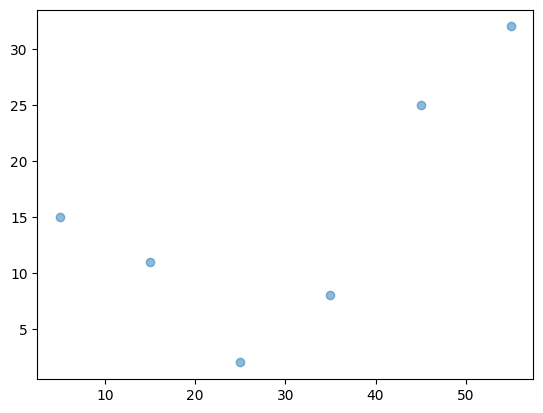

In [64]:
plt.scatter(x, y, alpha=0.5)

#### Bias False


In [68]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer

PolynomialFeatures(include_bias=False)

In [69]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [70]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [72]:
x_ = transformer.transform(x)
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [75]:
x_[:, 0]

array([ 5., 15., 25., 35., 45., 55.])

In [76]:
x_[:, 1]

array([  25.,  225.,  625., 1225., 2025., 3025.])

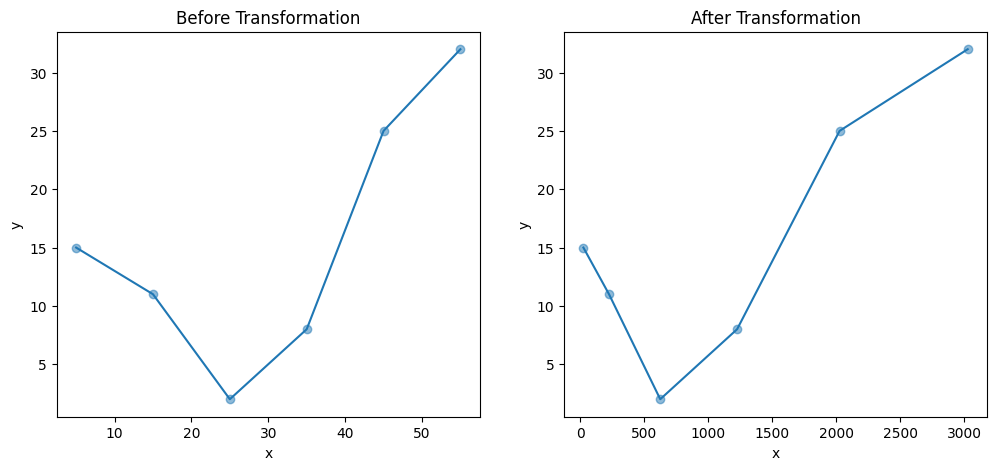

In [107]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x_[:, 0], y, alpha=0.5)
ax1.plot(x_[:, 0], y)
ax1.set_title("Before Transformation")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(x_[:, 1], y, alpha=0.5)
ax2.plot(x_[:, 1], y)
ax2.set_title("After Transformation")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.show()

##### Model Training


In [108]:
model = LinearRegression()
model

LinearRegression()

In [109]:
model.fit(x_, y)

LinearRegression()

##### Model Evaluation


In [110]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8908516262498564
intercept: 21.37232142857144
slope: [-1.32357143  0.02839286]


$y = b_0 + b_1 \cdot X_1 + b_2 \cdot X_2$

$y = 21.37232142857144 + (-1.32357143 \cdot X_1) + 0.02839286 \cdot X_2$


In [111]:
y_pred = model.predict(x_)
print(f"predicted response: \n{y_pred}")

predicted response: 
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [113]:
y_pred = model.intercept_ + np.sum(model.coef_ * x_, axis=1)
print(f"predicted response: \n{y_pred}")

predicted response: 
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


#### Bias True


In [114]:
transformer = PolynomialFeatures(degree=2, include_bias=True)
transformer

PolynomialFeatures()

In [115]:
transformer.fit(x)

PolynomialFeatures()

In [116]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [117]:
x_ = transformer.transform(x)
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [119]:
x_[:, 1]

array([ 5., 15., 25., 35., 45., 55.])

In [120]:
x_[:, -1]

array([  25.,  225.,  625., 1225., 2025., 3025.])

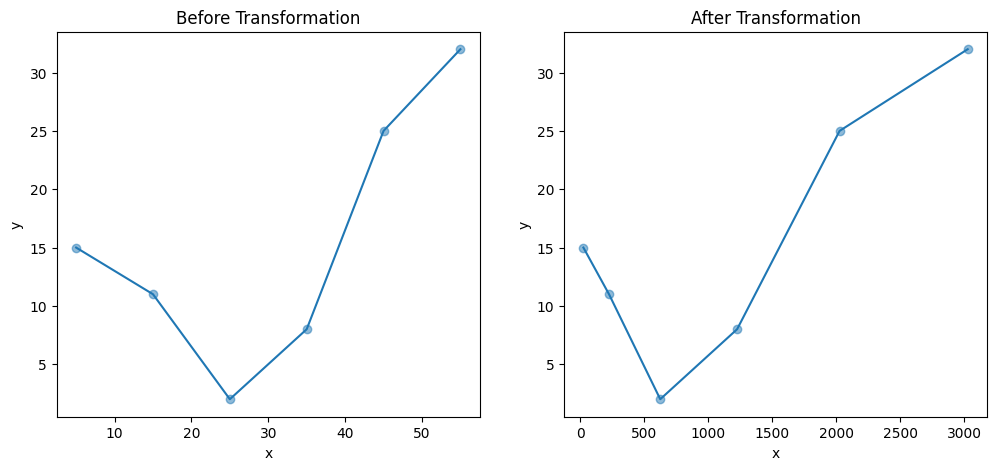

In [121]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x_[:, 1], y, alpha=0.5)
ax1.plot(x_[:, 1], y)
ax1.set_title("Before Transformation")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(x_[:, -1], y, alpha=0.5)
ax2.plot(x_[:, -1], y)
ax2.set_title("After Transformation")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.show()

##### Model Training


In [132]:
model = LinearRegression(fit_intercept=False)
model

LinearRegression(fit_intercept=False)

In [133]:
model.fit(x_, y)

LinearRegression(fit_intercept=False)

##### Model Evaluation


In [134]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8908516262498564
intercept: 0.0
slope: [21.37232143 -1.32357143  0.02839286]


$y = b_0 + b_1 \cdot X_1 + b_2 \cdot X_2 + b_3 \cdot X_3$

$y = 0 + 21.37232142857144 \cdot X_1 + (-1.32357143 \cdot X_2) + 0.02839286 \cdot X_3$


In [135]:
y_pred = model.predict(x_)
print(f"predicted response: \n{y_pred}")

predicted response: 
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [136]:
y_pred = model.intercept_ + np.sum(model.coef_ * x_, axis=1)
print(f"predicted response: \n{y_pred}")

predicted response: 
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]
